In [ ]:
%pip install -r requirements.txt

# 1 VISUALIZATION

## 1.1 PetClinic

In [3]:
"""
The goal of this jupyter notebook is to parse the .json formatted graph that GraphWalker outputs
and visualize it (say via a dot file) using networkx.

We will first focus ont he .json file inside:
/java-petclinic/src/main/resources/com/company/PetClinic.json
"""
# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt

# load the json file
with open('java-petclinic/src/main/resources/com/company/PetClinic.json') as f:
    data = json.load(f)
    
# print the data
print(data)

{'models': [{'name': 'FindOwners', 'id': '476fb419-3d7d-4492-802e-6695fe93f595', 'generator': 'random(edge_coverage(100))', 'actions': [], 'vertices': [{'id': 'b53814ec-468c-11e7-a919-92ebcb67fe33', 'name': 'v_FindOwners', 'sharedState': 'FindOwners', 'actions': [], 'requirements': [], 'properties': {'x': 0, 'y': 0}}, {'id': 'dcb0e896-468c-11e7-a919-92ebcb67fe33', 'name': 'v_NewOwner', 'sharedState': 'NewOwner', 'actions': [], 'requirements': [], 'properties': {'x': 120.65625, 'y': -157.8125}}, {'id': 'dcb0f200-468c-11e7-a919-92ebcb67fe33', 'name': 'v_Owners', 'actions': [], 'requirements': [], 'properties': {'x': -219.34375, 'y': -187.8125}}], 'edges': [{'id': 'dcb0fb88-468c-11e7-a919-92ebcb67fe33', 'name': 'e_AddOwner', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'b53814ec-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0e896-468c-11e7-a919-92ebcb67fe33'}, {'id': 'dcb0fd5e-468c-11e7-a919-92ebcb67fe33', 'name': 'e_FindOwners', 'actions': [], 'requirement

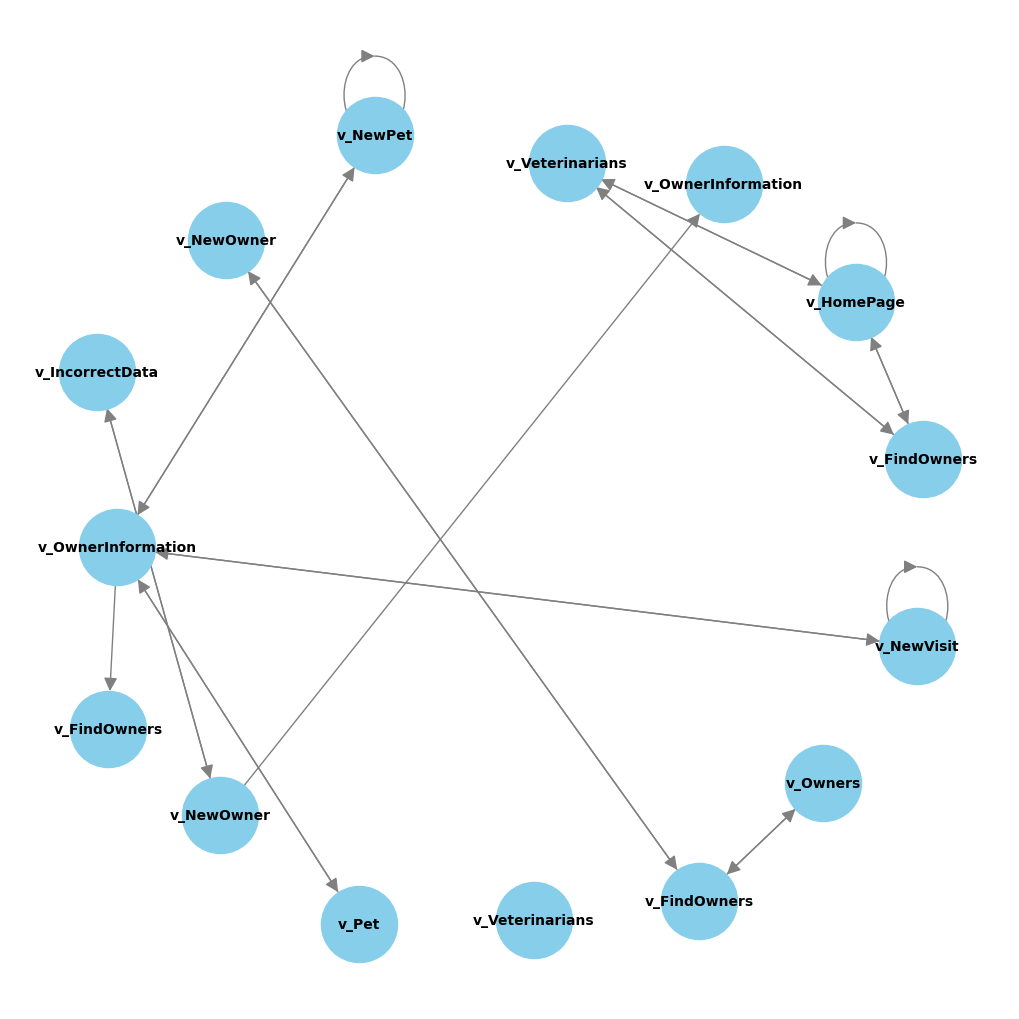

In [11]:
""" Now we know the json file looks like this:
{'models': [{'name': 'FindOwners', 'id': '476fb419-3d7d-4492-802e-6695fe93f595', 'generator': 'random(edge_coverage(100))', 'actions': [], 'vertices': [{'id': 'b53814ec-468c-11e7-a919-92ebcb67fe33', 'name': 'v_FindOwners', 'sharedState': 'FindOwners', 'actions': [], 'requirements': [], 'properties': {'x': 0, 'y': 0}}, {'id': 'dcb0e896-468c-11e7-a919-92ebcb67fe33', 'name': 'v_NewOwner', 'sharedState': 'NewOwner', 'actions': [], 'requirements': [], 'properties': {'x': 120.65625, 'y': -157.8125}}, {'id': 'dcb0f200-468c-11e7-a919-92ebcb67fe33', 'name': 'v_Owners', 'actions': [], 'requirements': [], 'properties': {'x': -219.34375, 'y': -187.8125}}], 'edges': [{'id': 'dcb0fb88-468c-11e7-a919-92ebcb67fe33', 'name': 'e_AddOwner', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'b53814ec-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0e896-468c-11e7-a919-92ebcb67fe33'}, {'id': 'dcb0fd5e-468c-11e7-a919-92ebcb67fe33', 'name': 'e_FindOwners', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0e896-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'b53814ec-468c-11e7-a919-92ebcb67fe33'}, {'id': 'dcb0fe62-468c-11e7-a919-92ebcb67fe33', 'name': 'e_Search', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'b53814ec-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0f200-468c-11e7-a919-92ebcb67fe33'}, {'id': 'dcb0ff34-468c-11e7-a919-92ebcb67fe33', 'name': 'e_FindOwners', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0f200-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'b53814ec-468c-11e7-a919-92ebcb67fe33'}], 'startElementId': '32ea3d10-789a-11ea-8c87-010078a2bc20'}, {'name': 'NewOwner', 'id': 'b23d193c-287a-4eb9-a318-52ead7680ff7', 'generator': 'random(edge_coverage(100))', 'actions': [], 'vertices': [{'id': 'dcb0d798-468c-11e7-a919-92ebcb67fe33', 'name': 'v_NewOwner', 'sharedState': 'NewOwner', 'actions': [], 'requirements': [], 'properties': {'x': 0, 'y': 0}}, {'id': 'dcb0eab2-468c-11e7-a919-92ebcb67fe33', 'name': 'v_IncorrectData', 'actions': [], 'requirements': [], 'properties': {'x': 131.65625, 'y': -205.3125}}, {'id': 'dcb0f3c2-468c-11e7-a919-92ebcb67fe33', 'name': 'v_OwnerInformation', 'sharedState': 'OwnerInformation', 'actions': [], 'requirements': [], 'properties': {'x': -284.34375, 'y': -143.3125}}], 'edges': [{'id': 'dcb104e8-468c-11e7-a919-92ebcb67fe33', 'name': 'e_IncorrectData', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0d798-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0eab2-468c-11e7-a919-92ebcb67fe33'}, {'id': 'dcb10736-468c-11e7-a919-92ebcb67fe33', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0eab2-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0d798-468c-11e7-a919-92ebcb67fe33'}, {'id': 'dcb10812-468c-11e7-a919-92ebcb67fe33', 'name': 'e_CorrectData', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0d798-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0f3c2-468c-11e7-a919-92ebcb67fe33'}], 'startElementId': '32ea3d10-789a-11ea-8c87-010078a2bc20'}, {'name': 'OwnerInformation', 'id': '5f1149c3-2853-47e6-838d-691bf30406a8', 'generator': 'random(edge_coverage(100))', 'actions': ['numOfPets=0;'], 'vertices': [{'id': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33', 'name': 'v_OwnerInformation', 'sharedState': 'OwnerInformation', 'actions': [], 'requirements': [], 'properties': {'x': -23.34375, 'y': -51.8125}}, {'id': 'dcb0ebb6-468c-11e7-a919-92ebcb67fe33', 'name': 'v_NewPet', 'actions': [], 'requirements': [], 'properties': {'x': -27.34375, 'y': 118.1875}}, {'id': 'dcb0f8a4-468c-11e7-a919-92ebcb67fe33', 'name': 'v_Pet', 'actions': [], 'requirements': [], 'properties': {'x': -317.34375, 'y': 7.1875}}, {'id': '971ec0b8-468d-11e7-a919-92ebcb67fe33', 'name': 'v_NewVisit', 'actions': [], 'requirements': [], 'properties': {'x': 139.65625, 'y': -195.8125}}, {'id': '971ec57c-468d-11e7-a919-92ebcb67fe33', 'name': 'v_FindOwners', 'sharedState': 'FindOwners', 'actions': [], 'requirements': [], 'properties': {'x': -270.34375, 'y': -181.8125}}], 'edges': [{'id': '971ec838-468d-11e7-a919-92ebcb67fe33', 'name': 'e_AddPetSuccessfully', 'actions': [' numOfPets++;'], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0ebb6-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ecaa4-468d-11e7-a919-92ebcb67fe33', 'name': 'e_AddNewPet', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0ebb6-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ecca2-468d-11e7-a919-92ebcb67fe33', 'name': 'e_EditPet', 'guard': 'numOfPets>0', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0f8a4-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ece78-468d-11e7-a919-92ebcb67fe33', 'name': 'e_UpdatePet', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0f8a4-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ed0b2-468d-11e7-a919-92ebcb67fe33', 'name': 'e_AddPetFailed', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0ebb6-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0ebb6-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ed3c8-468d-11e7-a919-92ebcb67fe33', 'name': 'e_AddVisit', 'guard': 'numOfPets>0', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': '971ec0b8-468d-11e7-a919-92ebcb67fe33'}, {'id': '971ed53a-468d-11e7-a919-92ebcb67fe33', 'name': 'e_VisitAddedSuccessfully', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': '971ec0b8-468d-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ed738-468d-11e7-a919-92ebcb67fe33', 'name': 'e_VisitAddedFailed', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': '971ec0b8-468d-11e7-a919-92ebcb67fe33', 'targetVertexId': '971ec0b8-468d-11e7-a919-92ebcb67fe33'}, {'id': '971edad0-468d-11e7-a919-92ebcb67fe33', 'name': 'e_FindOwners', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dba8-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': '971ec57c-468d-11e7-a919-92ebcb67fe33'}], 'startElementId': '32ea3d10-789a-11ea-8c87-010078a2bc20'}, {'name': 'PetClinic', 'id': '3f6b365f-7011-4db6-b0cc-e19aa453d9b8', 'generator': 'random(edge_coverage(100))', 'actions': [], 'vertices': [{'id': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33', 'name': 'v_HomePage', 'sharedState': 'HomePage', 'actions': [], 'requirements': [], 'properties': {'x': 0, 'y': 0}}, {'id': 'dcb0ef4e-468c-11e7-a919-92ebcb67fe33', 'name': 'v_FindOwners', 'sharedState': 'FindOwners', 'actions': [], 'requirements': [], 'properties': {'x': 112.65625, 'y': -180.8125}}, {'id': 'dcb0f8a5-468c-11e7-a919-92ebcb67fe33', 'name': 'v_Veterinarians', 'sharedState': 'Veterinarians', 'actions': [], 'requirements': [], 'properties': {'x': -246.34375, 'y': -153.8125}}], 'edges': [{'id': '971edcce-468d-11e7-a919-92ebcb67fe33', 'name': 'e_FindOwners', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0ef4e-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ede36-468d-11e7-a919-92ebcb67fe33', 'name': 'e_HomePage', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0ef4e-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ee142-468d-11e7-a919-92ebcb67fe33', 'name': 'e_Veterinarians', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0f8a5-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ee2b4-468d-11e7-a919-92ebcb67fe33', 'name': 'e_HomePage', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0f8a5-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ee5c0-468d-11e7-a919-92ebcb67fe33', 'name': 'e_Veterinarians', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0ef4e-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0f8a5-468c-11e7-a919-92ebcb67fe33'}, {'id': '971ee732-468d-11e7-a919-92ebcb67fe33', 'name': 'e_FindOwners', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0f8a5-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0ef4e-468c-11e7-a919-92ebcb67fe33'}, {'id': '32ea3d10-789a-11ea-8c87-010078a2bc20', 'name': 'e_StartBrowser', 'actions': [], 'requirements': [], 'properties': [], 'sourceVertexId': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33', 'targetVertexId': 'dcb0dde2-468c-11e7-a919-92ebcb67fe33'}], 'startElementId': '32ea3d10-789a-11ea-8c87-010078a2bc20'}, {'name': 'Veterinarians', 'id': '368a9635-c59a-4285-ad01-cf75b0baa978', 'generator': 'random(vertex_coverage(100))', 'actions': [], 'vertices': [{'id': 'dcb0defa-468c-11e7-a919-92ebcb67fe33', 'name': 'v_Veterinarians', 'sharedState': 'Veterinarians', 'actions': [], 'requirements': [], 'properties': {'x': 0, 'y': 0}}], 'edges': [], 'startElementId': '32ea3d10-789a-11ea-8c87-010078a2bc20'}]}

We can now parse this data and create a graph using networkx.
"""
# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt

# load the json file
with open('java-petclinic/src/main/resources/com/company/PetClinic.json') as f:
    data = json.load(f)
    
# create a directed graph
G = nx.DiGraph()

# iterate over the models
for model in data['models']:
    # iterate over the vertices
    for vertex in model['vertices']:
        G.add_node(vertex['id'], name=vertex['name'])
    # iterate over the edges
    for edge in model['edges']:
        edge_name = edge.get('name', 'Unnamed Edge')
        G.add_edge(edge['sourceVertexId'], edge['targetVertexId'], name=edge_name)
        
# draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=3)  # Increase the k value to spread nodes further apart
labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, arrowsize=20)

# show the graph
plt.show()

adjusted:
node size
edge colors
edge labels
self loops not overlapping with node it loops back to

C:\Users\yanok\AppData\Local\Temp\ipykernel_28736\2416528894.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


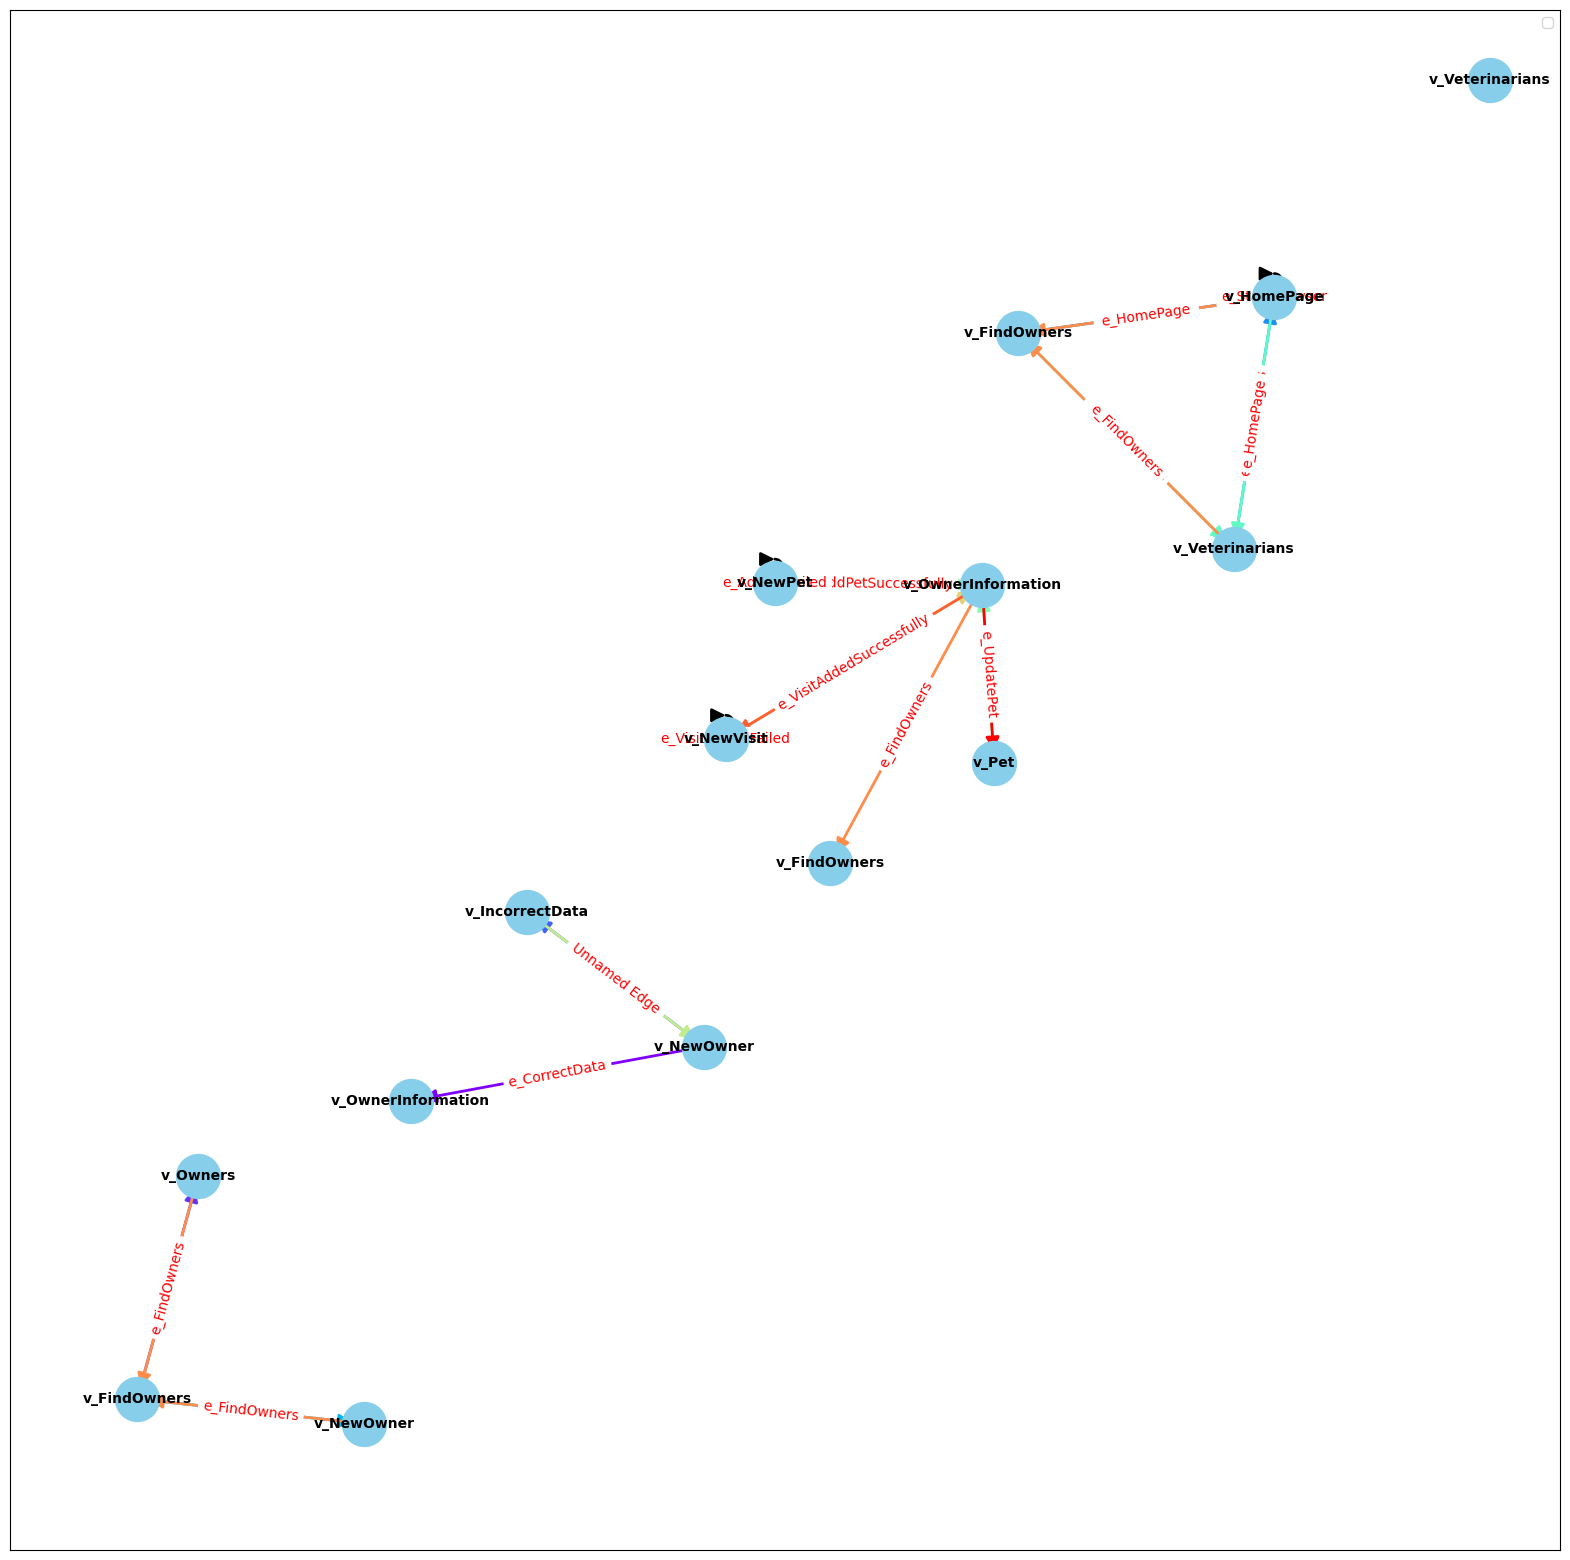

In [28]:
# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# load the json file
with open('java-petclinic/src/main/resources/com/company/PetClinic.json') as f:
    data = json.load(f)

# create a directed graph
G = nx.DiGraph()

# iterate over the models
for model in data['models']:
    # iterate over the vertices
    for vertex in model['vertices']:
        G.add_node(vertex['id'], name=vertex['name'])
    # iterate over the edges
    for edge in model['edges']:
        edge_name = edge.get('name', 'Unnamed Edge')
        G.add_edge(edge['sourceVertexId'], edge['targetVertexId'], name=edge_name)

# find connected components
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]

# draw the graph
plt.figure(figsize=(20, 20))  # Increase figure size
pos = {}
for i, component in enumerate(components):
    # layout for each component with adjusted k value
    component_pos = nx.spring_layout(component, k=100) 
    # offset the positions to avoid overlap
    offset = (i * 2, i * 2)
    for node in component_pos:
        component_pos[node] += offset
    pos.update(component_pos)

labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')  # Increase node size
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

# Draw edges with different colors based on their name
edge_names = set(nx.get_edge_attributes(G, 'name').values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(edge_names)))

# Separate self-loops from other edges
self_loops = [(u, v) for u, v in G.edges() if u == v]
other_edges = [(u, v) for u, v in G.edges() if u != v]

# Draw other edges
for edge_name, color in zip(edge_names, colors):
    edges = [(u, v) for u, v, d in G.edges(data=True) if d['name'] == edge_name and (u, v) not in self_loops]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=[color], label=edge_name, arrows=True, arrowsize=20, width=2)  # Increase edge width

# Draw exaggerated self-loops
for u, v in self_loops:
    loop_pos = pos[u] + np.array([0, 0])  # Exaggerate the position below the node
    nx.draw_networkx_edges(G, {u: pos[u], v: loop_pos}, edgelist=[(u, v)], edge_color='black', connectionstyle='arc3,rad=0.5', arrows=True, arrowsize=20, width=2)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'name')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.legend()
plt.show()

## 1.2: Annotation (With conversion from .graphml to .json)

In [15]:
# let's do the same thing and visualize the json inside the java-annotation folder
""" 
Before anything could happen, it is importnat to note that the model file inside the java-annotation folder
is in ".graphml" format. to convert this to a json file, we can use the template command:
java - jar graphwalker-cli-4.3.1.jar convert -i Login.graphml -f json
-- This automatically defaults to the json format as described here so we don't really need the -f flag: https://github.com/GraphWalker/graphwalker-project/wiki/Convert
-- To change adjus this into our desired file the command would then be:
java -jar graphwalker-cli-4.3.2.jar convert -i java-annotation/src/test/resources/org/graphwalker/example/CreateModel.graphml -f json
"""
!java -jar graphwalker-cli-4.3.2.jar convert -i java-annotation/src/test/resources/org/graphwalker/example/CreateModel.graphml -f json

{"models":[{"name":"CreateModel","id":"31f112c9-1965-4d09-b8a0-acbb1c0009ee","startElementId":"e4","vertices":[{"id":"n0","name":"validateModel","properties":{"x":418.0,"y":259.0}},{"id":"n1","name":"validateEdge","properties":{"x":46.0,"y":259.0}},{"id":"n2","name":"validateVertex","properties":{"x":790.0,"y":259.0}},{"id":"n4","name":"validateRuntimeModel","properties":{"x":398.5,"y":494.0}},{"id":"n5","name":"validateResult","properties":{"x":545.5,"y":662.75}},{"id":"n6","name":"validateResult","properties":{"x":295.75,"y":662.75}}],"edges":[{"id":"e0","name":"createEdge","actions":[" actions \u003d 0; guard \u003d false;"],"weight":0.0,"dependency":0,"sourceVertexId":"n0","targetVertexId":"n1"},{"id":"e1","name":"addEdge","actions":[" edges++;"],"weight":0.0,"dependency":0,"sourceVertexId":"n1","targetVertexId":"n0"},{"id":"e2","name":"createVertex","actions":[" shared \u003d false; requirements \u003d 0;"],"weight":0.0,"dependency":0,"sourceVertexId":"n0","targetVertexId":"n2"},{

JSON Output:
{"models":[{"name":"CreateModel","id":"15a6415a-90c8-4d58-8f26-e97621dcb107","startElementId":"e4","vertices":[{"id":"n0","name":"validateModel","properties":{"x":418.0,"y":259.0}},{"id":"n1","name":"validateEdge","properties":{"x":46.0,"y":259.0}},{"id":"n2","name":"validateVertex","properties":{"x":790.0,"y":259.0}},{"id":"n4","name":"validateRuntimeModel","properties":{"x":398.5,"y":494.0}},{"id":"n5","name":"validateResult","properties":{"x":545.5,"y":662.75}},{"id":"n6","name":"validateResult","properties":{"x":295.75,"y":662.75}}],"edges":[{"id":"e0","name":"createEdge","actions":[" actions \u003d 0; guard \u003d false;"],"weight":0.0,"dependency":0,"sourceVertexId":"n0","targetVertexId":"n1"},{"id":"e1","name":"addEdge","actions":[" edges++;"],"weight":0.0,"dependency":0,"sourceVertexId":"n1","targetVertexId":"n0"},{"id":"e2","name":"createVertex","actions":[" shared \u003d false; requirements \u003d 0;"],"weight":0.0,"dependency":0,"sourceVertexId":"n0","targetVert

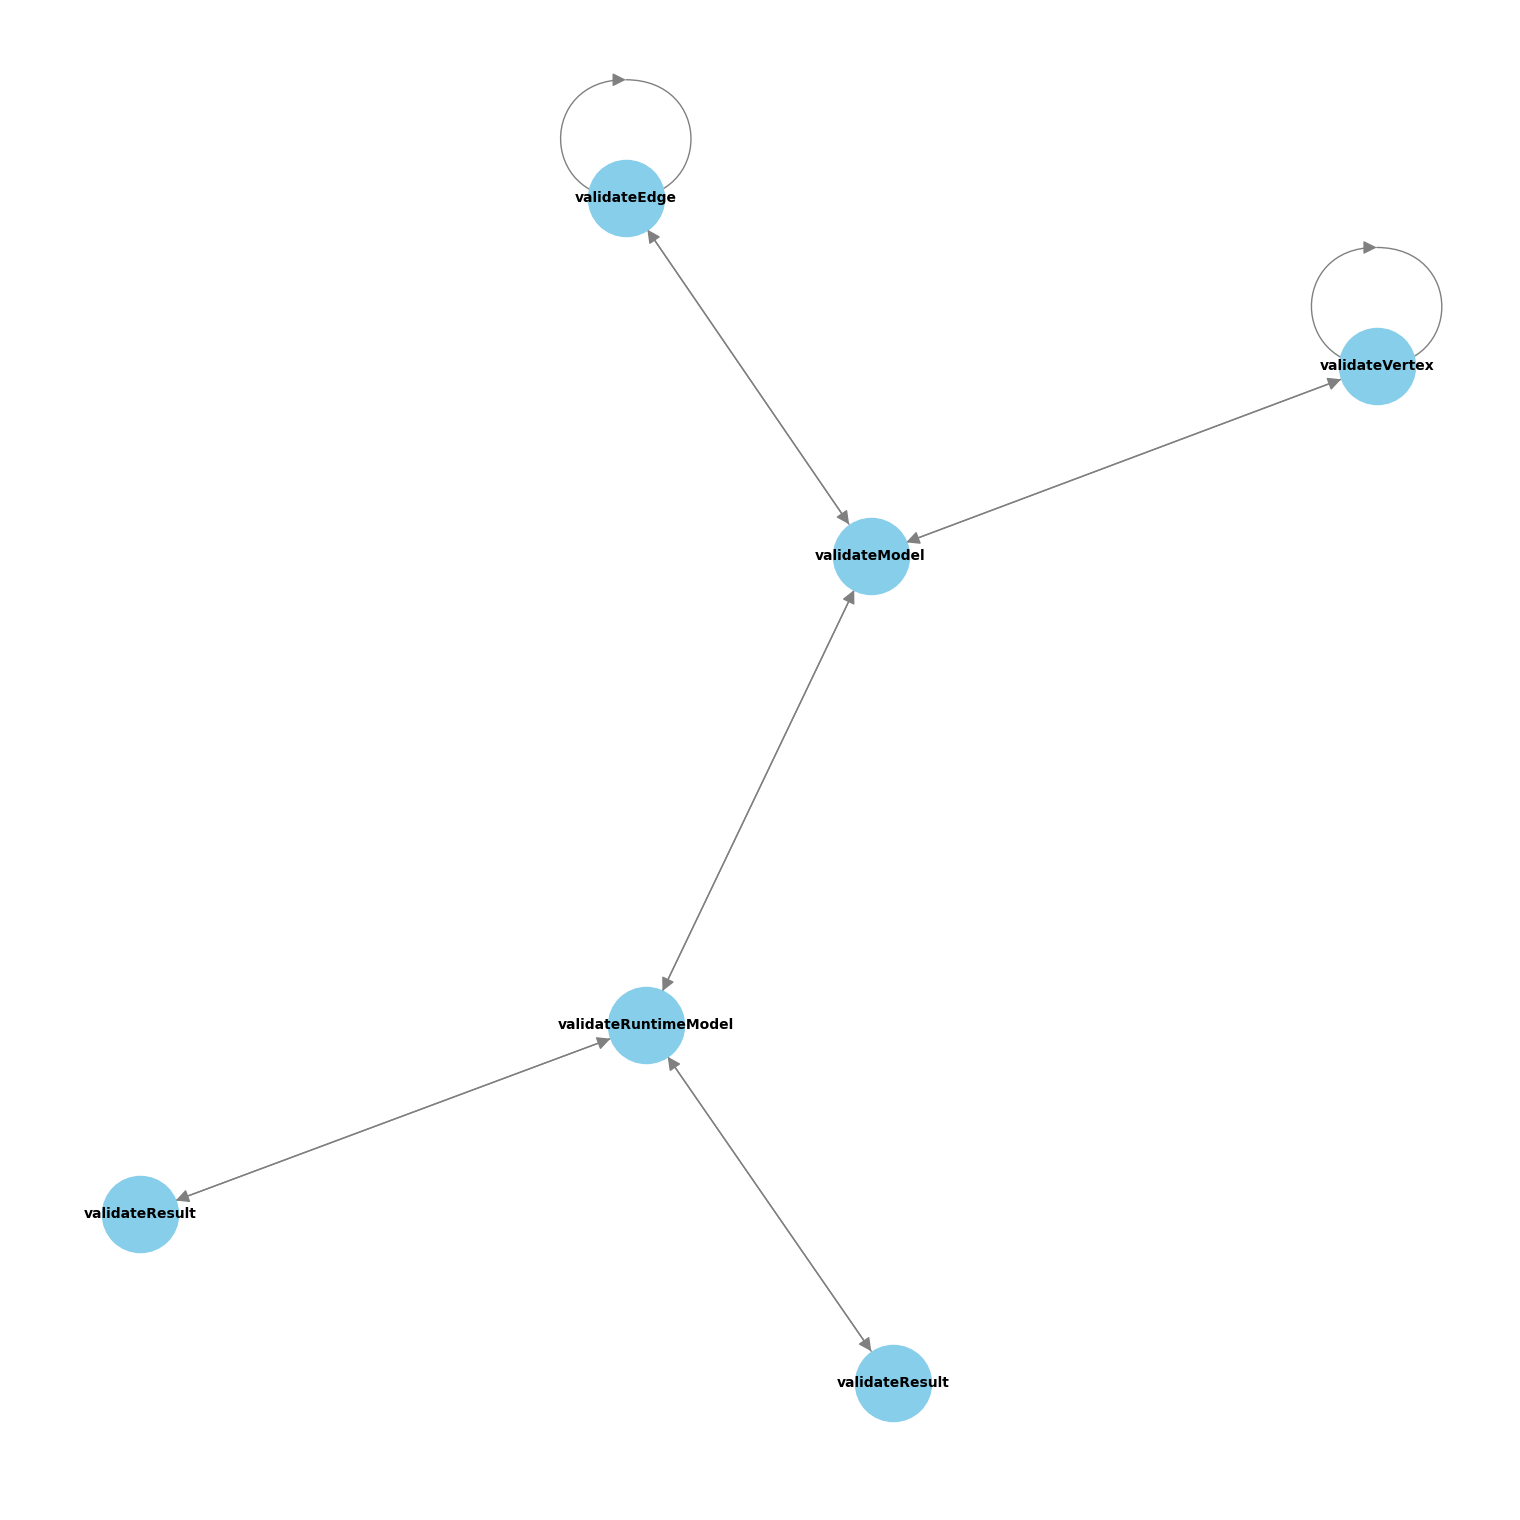

In [22]:
# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt
import subprocess

# Run the graphwalker-cli command and capture the output
try:
    result = subprocess.run(
        ['java', '-jar', 'graphwalker-cli-4.3.2.jar', 'convert', '-i', 'java-annotation/src/test/resources/org/graphwalker/example/CreateModel.graphml', '-f', 'json'],
        capture_output=True,
        text=True,
        check=True
    )
except subprocess.CalledProcessError as e:
    print(f"Error occurred while running the command: {e}")
    print(f"stderr: {e.stderr}")
    raise

# Store the output as a Python variable
json_output = result.stdout

# Print the JSON output for debugging
print("JSON Output:")
print(json_output)

# Load the JSON data
try:
    data = json.loads(json_output)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    raise

# create a directed graph
G = nx.DiGraph()

# iterate over the models
for model in data['models']:
    # iterate over the vertices
    for vertex in model['vertices']:
        G.add_node(vertex['id'], name=vertex['name'])
    # iterate over the edges
    for edge in model['edges']:
        # Check if the required keys exist in the edge
        if 'sourceVertexId' in edge and 'targetVertexId' in edge:
            edge_name = edge.get('name', 'Unnamed Edge')
            G.add_edge(edge['sourceVertexId'], edge['targetVertexId'], name=edge_name)
        else:
            print(f"Missing sourceVertexId or targetVertexId in edge: {edge}")

# find connected components
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]

# draw the graph
plt.figure(figsize=(15, 15))
pos = {}
for i, component in enumerate(components):
    # layout for each component
    component_pos = nx.spring_layout(component, k=0.5)
    # offset the positions to avoid overlap
    offset = (i * 2, i * 2)
    for node in component_pos:
        component_pos[node] += offset
    pos.update(component_pos)

labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, arrowsize=20)

# show the graph
plt.show()

# 1.3: Visualizing java-amazon

{'models': [{'name': 'ShoppingCart', 'id': 'c0bf6a8e-91ef-40db-a68a-7aa7ec1ce9b0', 'generator': 'random(edge_coverage(100))', 'actions': ['num_of_books = 0'], 'vertices': [{'id': 'n2', 'name': 'v_Amazon', 'actions': [], 'requirements': ['UC01 2.2.1'], 'properties': {'x': -10.412944615028449, 'y': 115.66708390015405, 'description': "Verify that Amazon's home page is properly displayed."}}, {'id': 'n3', 'name': 'v_SearchResult', 'actions': [], 'requirements': ['UC01 2.2.2'], 'properties': {'x': -100.57134021381405, 'y': 275.55366784960654, 'description': "Verify that in the search result list, the book 'Practical Model-Based Testing: A Tools Approach by Mark Utting and Bruno Legeard' exists."}}, {'id': 'n4', 'name': 'v_BookInformation', 'actions': [], 'requirements': ['UC01 2.2.3'], 'properties': {'x': 287.8014072034673, 'y': 284.42800707215497, 'description': "Verify that the page displaing detailed information regarding '\nPractical Model-Based Testing: A Tools Approach' is correct."}}

C:\Users\yanok\AppData\Local\Temp\ipykernel_28736\395614997.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


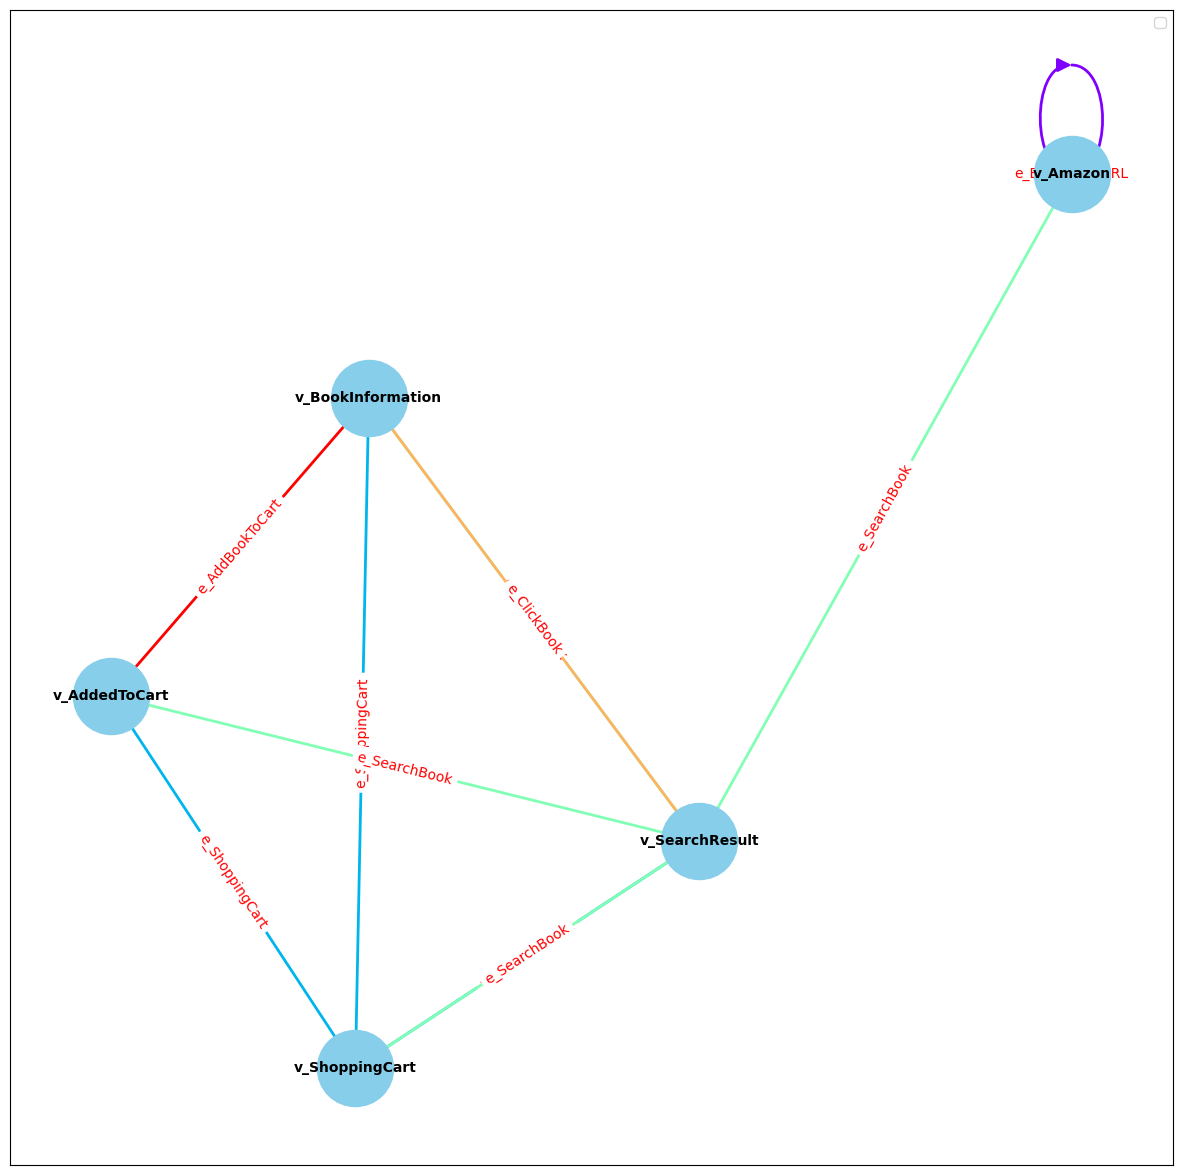

In [31]:
# let's visualize the .json file in the java-amazon project
# let's make sure grouped nodes are close to each other
# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# load the json file
with open('java-amazon/src/main/resources/org/graphwalker/ShoppingCart.json') as f:
    data = json.load(f)
    # print the data
    print(data)
    
# create a directed graph
G = nx.DiGraph()

# iterate over the models
for model in data['models']:
    # iterate over the vertices
    for vertex in model['vertices']:
        G.add_node(vertex['id'], name=vertex['name'])
    # iterate over the edges
    for edge in model['edges']:
        edge_name = edge.get('name', 'Unnamed Edge')
        G.add_edge(edge['sourceVertexId'], edge['targetVertexId'], name=edge_name)

# find connected components
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]

# draw the graph
plt.figure(figsize=(15, 15))
pos = {}
for i, component in enumerate(components):
    # layout for each component
    component_pos = nx.spring_layout(component, k=0.5)
    # offset the positions to avoid overlap
    offset = (i * 2, i * 2)
    for node in component_pos:
        component_pos[node] += offset
    pos.update(component_pos)

labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

# Draw edges with different colors based on their name
edge_names = set(nx.get_edge_attributes(G, 'name').values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(edge_names)))

# Draw edges and add edge labels
for edge_name, color in zip(edge_names, colors):
    edges = [(u, v) for u, v, d in G.edges(data=True) if d['name'] == edge_name]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=[color], label=edge_name, arrows=True, arrowsize=20, width=2)
    edge_labels = {(u, v): d['name'] for u, v, d in G.edges(data=True) if d['name'] == edge_name}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', label_pos=0.5)

# show the graph
plt.legend()
plt.show()

## 1.4: Appium: NoteList

JSON Output:
{"models":[{"name":"NotesList","id":"ea3f8de7-fb6d-44b6-b998-dae820d1171f","actions":["numberOfNotes \u003d 0;"],"vertices":[{"id":"n0","name":"v_NotesListView","properties":{"x":129.2987289186508,"y":102.96875000000003}},{"id":"n1","name":"v_NewNoteView","properties":{"x":133.0438461061508,"y":233.90625000000009}},{"id":"n2","name":"v_EditNoteView","properties":{"x":319.5595703125,"y":-15.0}},{"id":"n3","name":"v_EditTitleView","properties":{"x":339.4150390625,"y":-176.0}}],"edges":[{"id":"e0","name":"e_GoToNewNoteView","weight":0.0,"dependency":0,"sourceVertexId":"n0","targetVertexId":"n1"},{"id":"e1","name":"e_Discard","weight":0.0,"dependency":0,"sourceVertexId":"n1","targetVertexId":"n0"},{"id":"e2","name":"e_Create","actions":["numberOfNotes++;"],"weight":0.0,"dependency":0,"sourceVertexId":"n1","targetVertexId":"n0"},{"id":"e3","name":"e_Done","properties":{"description":""},"weight":0.0,"dependency":0,"sourceVertexId":"n3","targetVertexId":"n2"},{"id":"e4","name":"

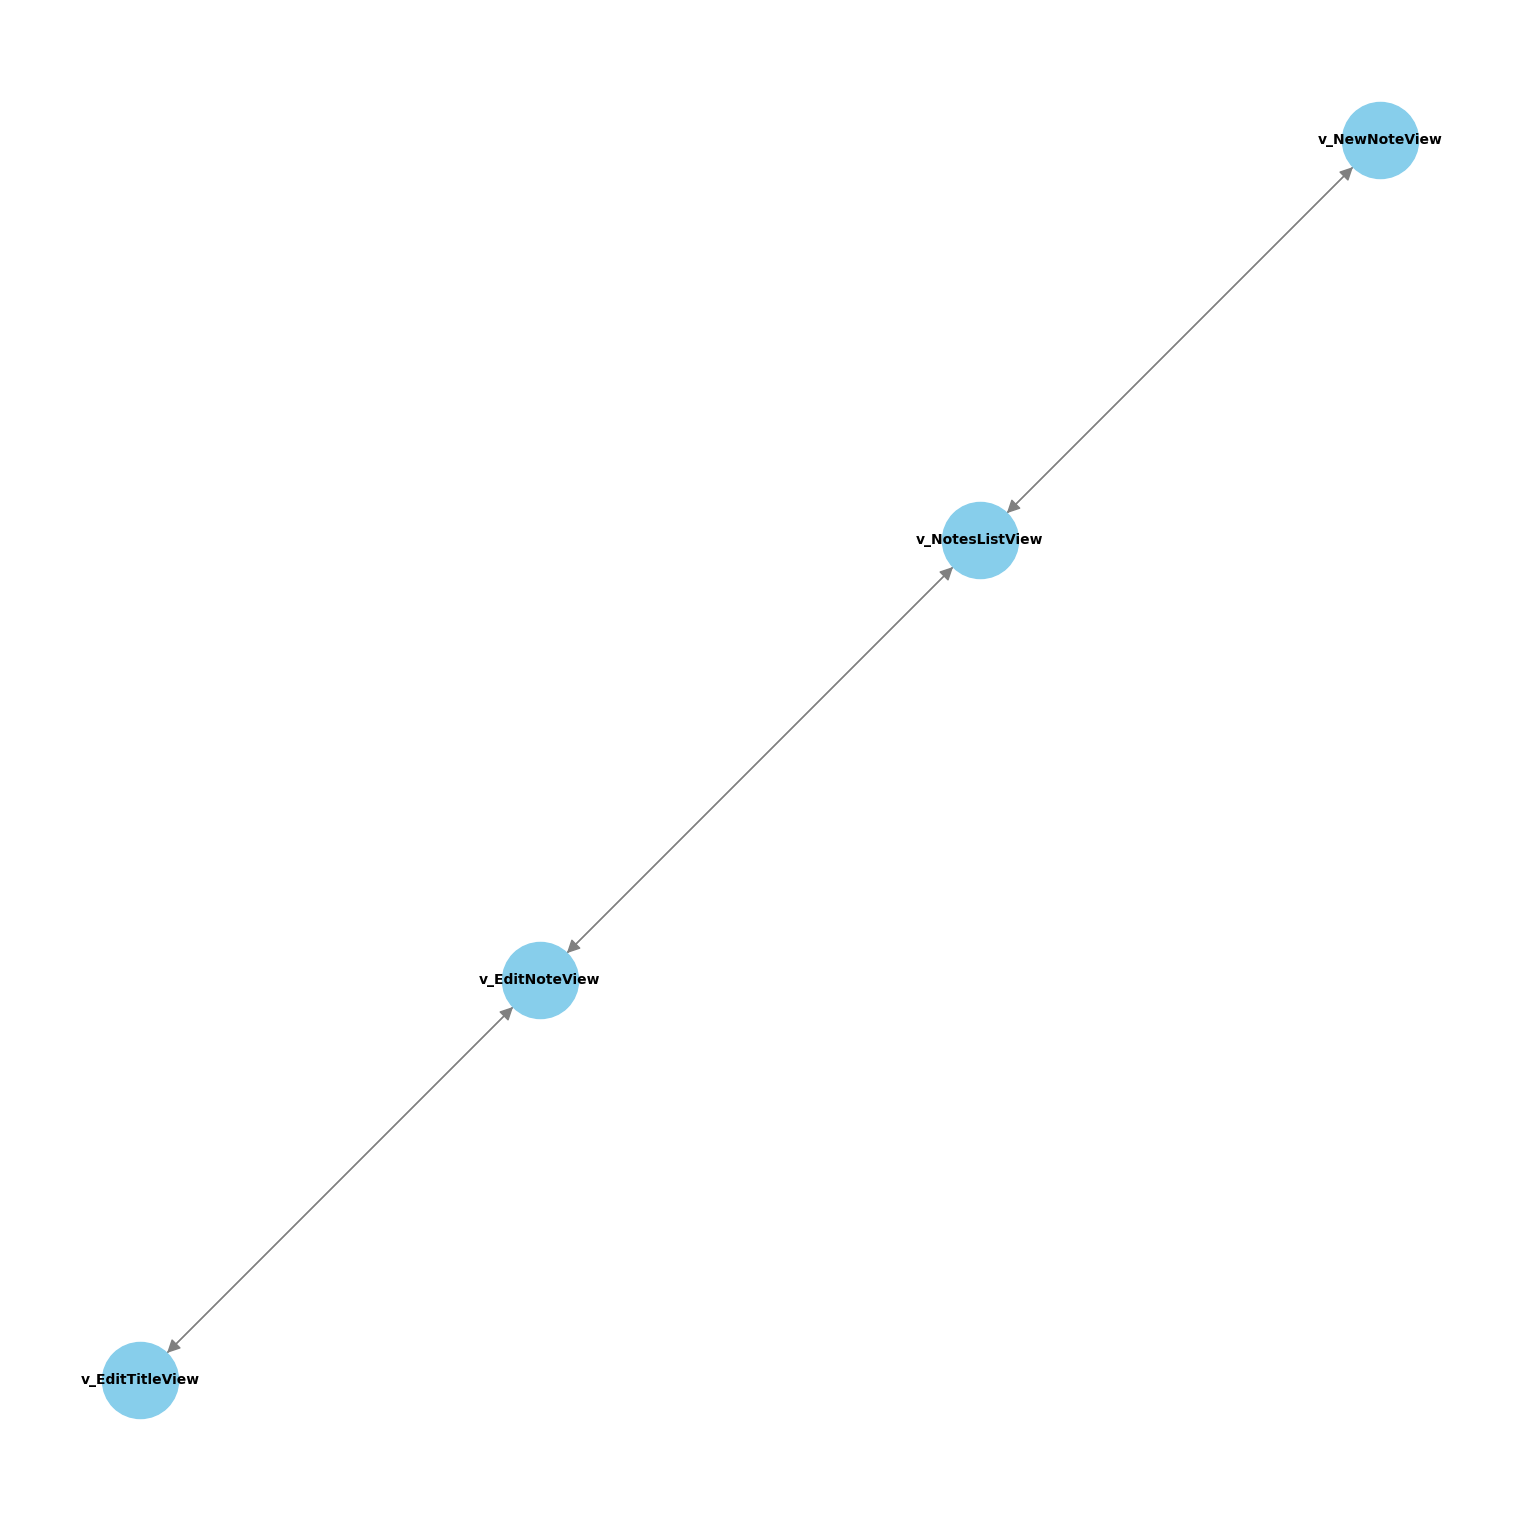

In [27]:
# let's also visualize java-appium\src\main\resources\org\graphwalker\appium\NotesList.graphml

# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt
import subprocess

graphml_file = "java-appium/src/main/resources/org/graphwalker/appium/NotesList.graphml"
# Run the graphwalker-cli command and capture the output
try:
    result = subprocess.run(
        ['java', '-jar', 'graphwalker-cli-4.3.2.jar', 'convert', '-i', graphml_file, '-f', 'json'],
        capture_output=True,
        text=True,
        check=True
    )
except subprocess.CalledProcessError as e:
    print(f"Error occurred while running the command: {e}")
    print(f"stderr: {e.stderr}")
    raise

# Store the output as a Python variable
json_output = result.stdout

# Print the JSON output for debugging
print("JSON Output:")
print(json_output)

# Load the JSON data
try:
    data = json.loads(json_output)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    raise

# create a directed graph
G = nx.DiGraph()

# iterate over the models
for model in data['models']:
    # iterate over the vertices
    for vertex in model['vertices']:
        G.add_node(vertex['id'], name=vertex['name'])
    # iterate over the edges
    for edge in model['edges']:
        # Check if the required keys exist in the edge
        if 'sourceVertexId' in edge and 'targetVertexId' in edge:
            edge_name = edge.get('name', 'Unnamed Edge')
            G.add_edge(edge['sourceVertexId'], edge['targetVertexId'], name=edge_name)
        else:
            print(f"Missing sourceVertexId or targetVertexId in edge: {edge}")

# find connected components
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]

# draw the graph
plt.figure(figsize=(15, 15))
pos = {}
for i, component in enumerate(components):
    # layout for each component
    component_pos = nx.spring_layout(component, k=0.5)
    # offset the positions to avoid overlap
    offset = (i * 2, i * 2)
    for node in component_pos:
        component_pos[node] += offset
    pos.update(component_pos)

labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, arrowsize=20)

# show the graph
plt.show()

## 1.5: dataDriven

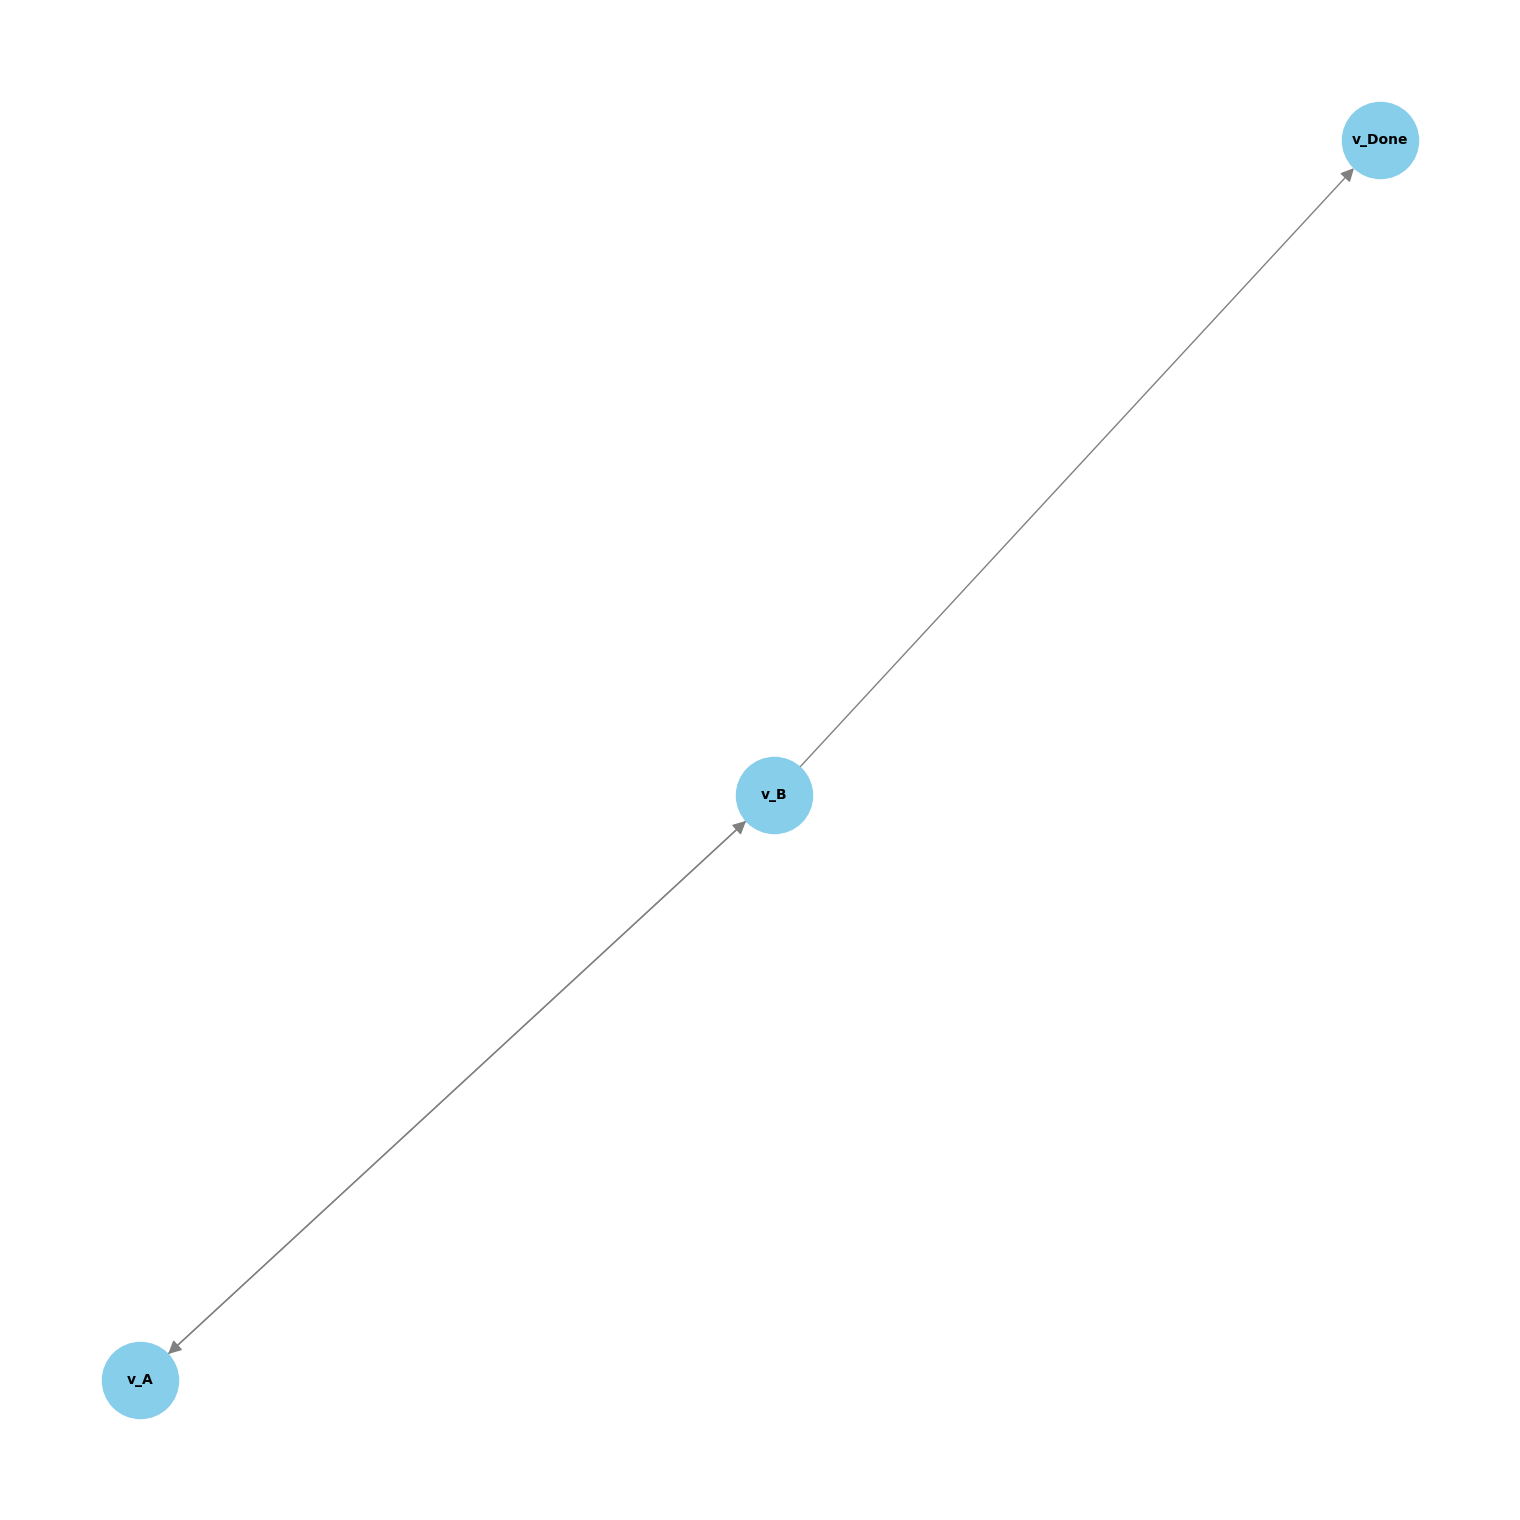

In [28]:
# let's visualize the .json file in the java-amazon project
# let's make sure grouped nodes are close to each other
# import the necessary libraries
import json
import networkx as nx
import matplotlib.pyplot as plt

# load the json file
with open('java-dataDriven/src/main/resources/org/graphwalker/UsingDataFromTest.json') as f:
    data = json.load(f)
    
# create a directed graph
G = nx.DiGraph()

# iterate over the models
for model in data['models']:
    # iterate over the vertices
    for vertex in model['vertices']:
        G.add_node(vertex['id'], name=vertex['name'])
    # iterate over the edges
    for edge in model['edges']:
        edge_name = edge.get('name', 'Unnamed Edge')
        G.add_edge(edge['sourceVertexId'], edge['targetVertexId'], name=edge_name)

# find connected components
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]

# draw the graph
plt.figure(figsize=(15, 15))
pos = {}
for i, component in enumerate(components):
    # layout for each component
    component_pos = nx.spring_layout(component, k=0.5)
    # offset the positions to avoid overlap
    offset = (i * 2, i * 2)
    for node in component_pos:
        component_pos[node] += offset
    pos.update(component_pos)

labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, arrowsize=20)

# show the graph
plt.show()

# 2. OFFLINE Testing (https://github.com/GraphWalker/graphwalker-project/wiki/Offline)
template command:
```bash
java -jar graphwalker-cli-4.3.2.jar GLOBAL_OPTIONS offline OPTIONS -m <model-file> "GENERATOR(STOP_CONDITION)"
```

Example 1:
```bash
java -jar graphwalker-cli-4.3.2.jar offline -m model.graphml "random(edge_coverage(100))"
```

Exmaple 2: using a json model and the --model flag (instead of -m)
```bash
java -jar graphwalker-cli-4.3.2.jar offline --seed 147945811993279 --model model.json "random(edge_coverage(100))"
``` 


In [25]:
!java -jar graphwalker-cli-4.3.2.jar offline -m java-amazon/src/main/resources/org/graphwalker/ShoppingCart.json "random(edge_coverage(100))"

{"currentElementName":"e_EnterBaseURL"}
{"currentElementName":"v_Amazon"}
{"currentElementName":"e_EnterBaseURL"}
{"currentElementName":"v_Amazon"}
{"currentElementName":"e_SearchBook"}
{"currentElementName":"v_SearchResult"}
{"currentElementName":"e_ClickBook"}
{"currentElementName":"v_BookInformation"}
{"currentElementName":"e_ShoppingCart"}
{"currentElementName":"v_ShoppingCart"}
{"currentElementName":"e_SearchBook"}
{"currentElementName":"v_SearchResult"}
{"currentElementName":"e_ClickBook"}
{"currentElementName":"v_BookInformation"}
{"currentElementName":"e_ShoppingCart"}
{"currentElementName":"v_ShoppingCart"}
{"currentElementName":"e_SearchBook"}
{"currentElementName":"v_SearchResult"}
{"currentElementName":"e_ClickBook"}
{"currentElementName":"v_BookInformation"}
{"currentElementName":"e_AddBookToCart"}
{"currentElementName":"v_AddedToCart"}
{"currentElementName":"e_ShoppingCart"}
{"currentElementName":"v_ShoppingCart"}
{"currentElementName":"e_SearchBook"}
{"currentElementName